# Box plot and IQR 

Box plot is good when data is not normally distributed i.e. skew data

 It displays the following key statistics:

- Minimum: The smallest value in the dataset (excluding outliers).
- First Quartile (Q1): The median of the lower half of the dataset. (25%ile)
- Median (Q2): The middle value of the dataset. (50%ile)
- Third Quartile (Q3): The median of the upper half of the dataset.(75%ile)
- Maximum: The largest value in the dataset (excluding outliers).
- Outliers: Data points that are significantly higher or lower than the rest of the data.
- The boxplot consists of a box that spans from Q1 to Q3, with a line inside the box indicating the median. "Whiskers" extend from the box to the minimum and maximum values, and outliers are often shown as individual points.

### Interquatile Range (IQR)
Difference between 75%ile and 25%ile

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('E:\ml_revision\outliers\Datasets\placement.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Aditya\AppData\Local\Temp\ipykernel_15048\1508412341.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('E:\ml_revision\outliers\Datasets\placement.csv')


In [5]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\Aditya\AppData\Local\Temp\ipykernel_15048\962552361.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],color='red')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_15048\962552361.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],color='purple')


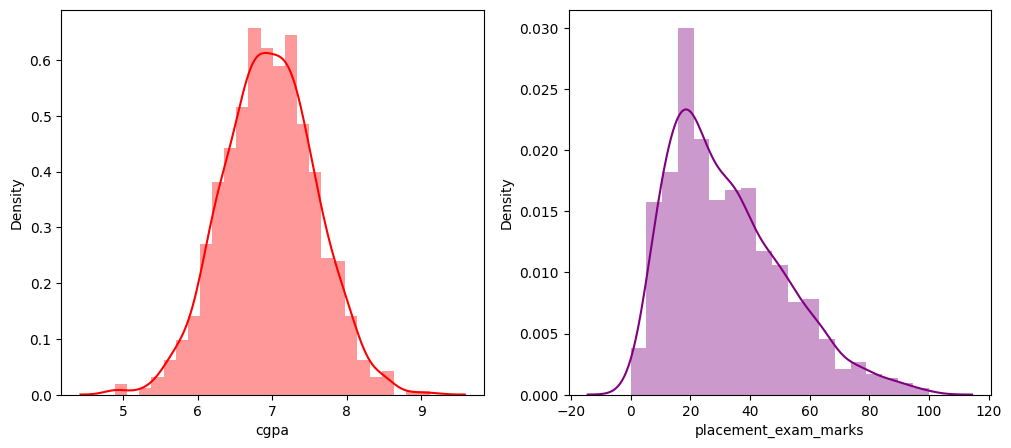

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'],color='red')


plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'],color='purple')

plt.show()

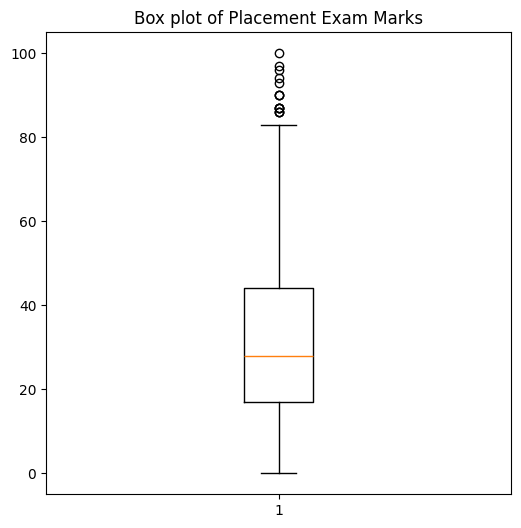

In [7]:
plt.figure(figsize=(6,6))
plt.boxplot(df['placement_exam_marks'])
plt.title("Box plot of Placement Exam Marks")
plt.show()

In [8]:
# Find the iqr 
percentile25 = df['placement_exam_marks'].quantile(0.25)
print("percentile25->",percentile25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
print("percentile75->",percentile75)
iqr = percentile75 - percentile25
print("iqr->",iqr)

percentile25-> 17.0
percentile75-> 44.0
iqr-> 27.0


In [9]:
upperlimit = percentile75 + 1.5*iqr
lowerlimit = percentile25 - 1.5*iqr
print("Upperlimit -> ",upperlimit)
print("lowerlimit -> ", lowerlimit)

Upperlimit ->  84.5
lowerlimit ->  -23.5


In [10]:
print("df shape before trimming -> " , df.shape)
df[(df['placement_exam_marks'] <= lowerlimit ) | (df['placement_exam_marks'] >= upperlimit)]

df shape before trimming ->  (1000, 3)


,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### Trimming

In [11]:
df_new1 = df[(df['placement_exam_marks'] >= lowerlimit ) & (df['placement_exam_marks'] <= upperlimit)]

In [12]:
print("df shape after trimming -> ", df_new1.shape)
df_new1

df shape after trimming ->  (985, 3)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\Aditya\AppData\Local\Temp\ipykernel_15048\2702865149.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new1['placement_exam_marks'],color='green')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_15048\2702865149.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_ma

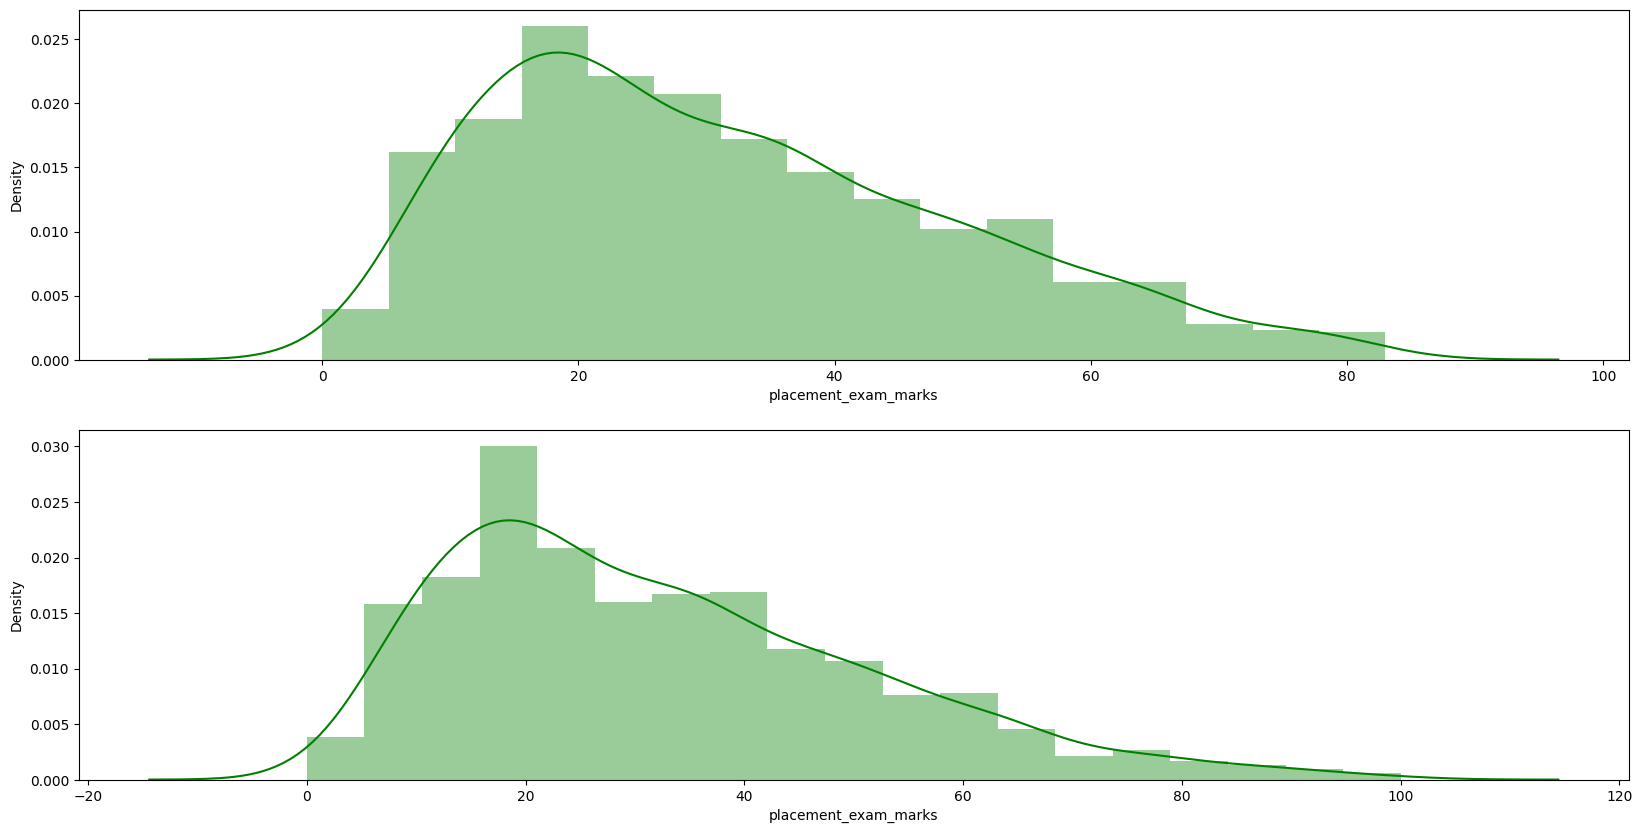

In [26]:
plt.figure(figsize=(20,10))


plt.subplot(2,1,1)
sns.distplot(df_new1['placement_exam_marks'],color='green')

plt.subplot(2,1,2)
sns.distplot(df['placement_exam_marks'],color='green')

plt.show()


### Capping

In [13]:
df_new2 = pd.DataFrame({
    'placement_exam_marks': np.where(
        df['placement_exam_marks'] >= upperlimit,
        upperlimit,
        df['placement_exam_marks']
    )
})

In [14]:
print("df shape after capping -> ", df_new2.shape)
df_new2

df shape after capping ->  (1000, 1)


,placement_exam_marks
0,26.0
1,38.0
2,40.0
3,8.0
4,17.0
...,...
995,44.0
996,65.0
997,34.0
998,46.0


C:\Users\Aditya\AppData\Local\Temp\ipykernel_15048\2581245440.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new2['placement_exam_marks'],color='purple')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_15048\2581245440.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_m

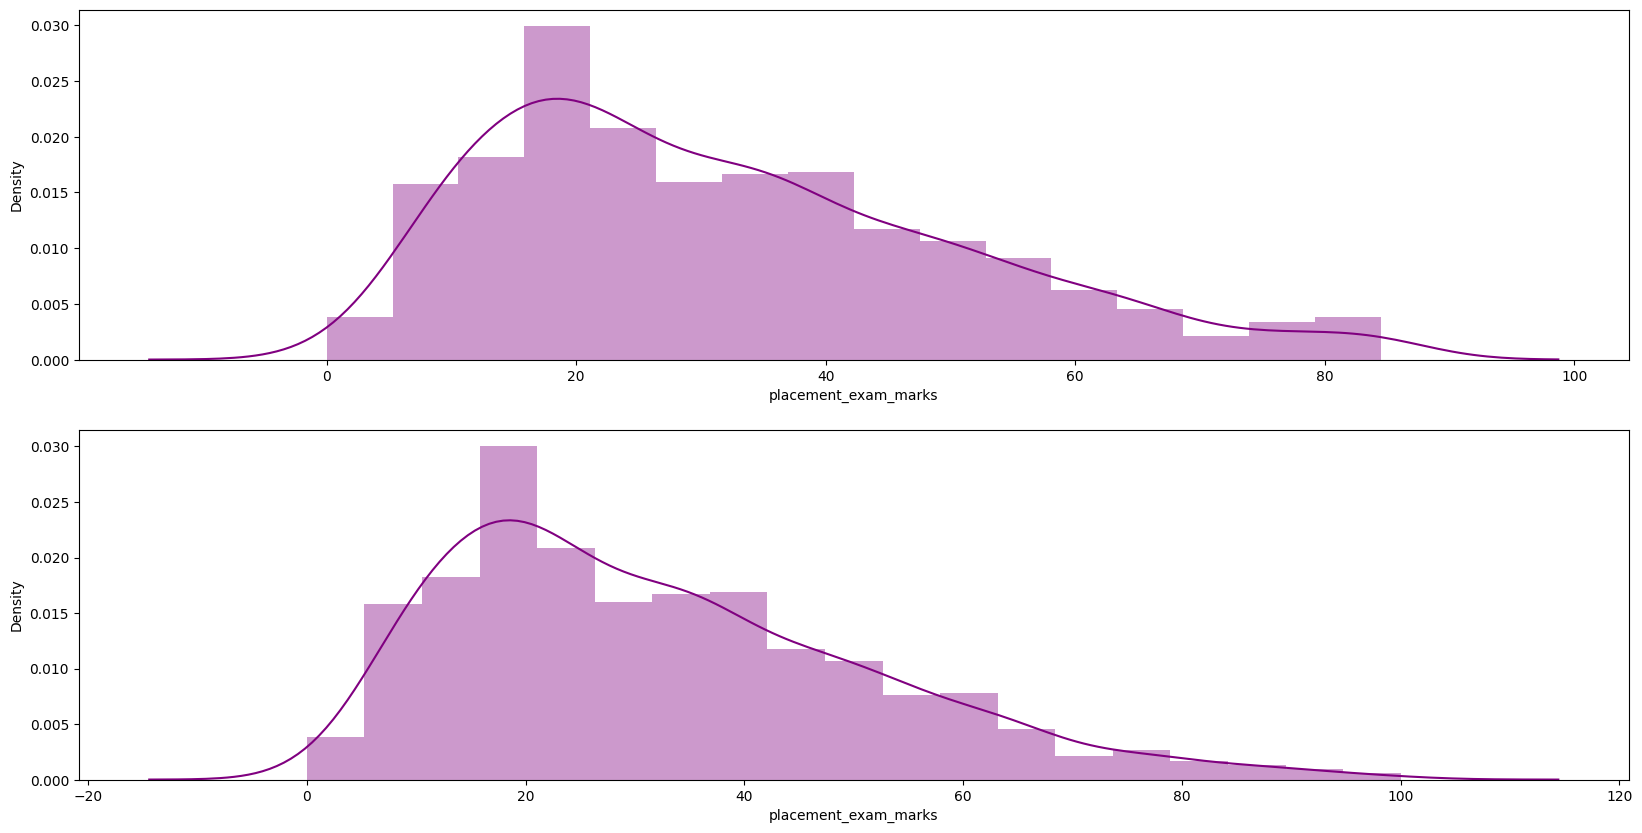

In [25]:
plt.figure(figsize=(20,10))


plt.subplot(2,1,1)
sns.distplot(df_new2['placement_exam_marks'],color='purple')

plt.subplot(2,1,2)
sns.distplot(df['placement_exam_marks'],color='purple')

plt.show()


### Look at the slight tilt in the graph at last i.e. 80th %ile